In [0]:
%tensorflow_version 1.x

import tensorflow as tf 
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


TensorFlow 1.x selected.
11493376/11490434 [==============================] - 0s 0us/step


In [0]:
BATCH_SIZE = 32
EPOCHS = 40
NUM_CLASSES = 10
LEARNING_RATE = 1e-4
MOMENTUM = 0.9

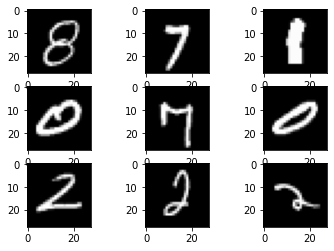

In [0]:
from matplotlib import pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.15, 
                                                  stratify=np.array(y_train), 
                                                  random_state=42)

In [0]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
Y_val = np_utils.to_categorical(y_val, NUM_CLASSES)
Y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

Using TensorFlow backend.


In [0]:
import numpy as np

X_train1 = np.ndarray(shape = (51000, 28,28,3), dtype = 'float32')
X_val1 =   np.ndarray(shape = (9000, 28,28,3), dtype = 'float32')
X_test1 = np.ndarray(shape = (10000,28,28,3), dtype = 'float32')

In [0]:
import cv2


for i in range(0,51000):
    X_train1[i] = cv2.cvtColor(X_train[i],cv2.COLOR_GRAY2BGR)
    
for i in range(0,9000):
    X_val1[i] = cv2.cvtColor(X_val[i],cv2.COLOR_GRAY2BGR)    
    
    
for i in range(0,10000):
    X_test1[i] = cv2.cvtColor(X_test[i],cv2.COLOR_GRAY2RGB)    

In [0]:
train_f = np.ndarray(shape = (51000,48,48,3), dtype = 'float32')
val_f = np.ndarray(shape = (9000,48,48,3) , dtype = 'float32')
test_f = np.ndarray(shape = (10000,48,48,3) , dtype = 'float32')

In [0]:
for i in range(0,51000):
     train_f[i] = cv2.resize(X_train1[i],(48,48))
        
for i in range(0,9000):
      val_f[i] = cv2.resize(X_val1[i],(48,48))  
      
for i in range(0,10000):
     test_f[i] = cv2.resize(X_test1[i],(48,48))    


In [0]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.applications.resnet50 import ResNet50

model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(124, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# model.layers[0].trainable = False



Instructions for updating:
If using Keras pass *_constraint arguments to layers.

94658560/94653016 [==============================] - 2s 0us/step


In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=LEARNING_RATE),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [0]:

X_train = train_f
X_val =   val_f
X_test =  test_f

In [0]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)


(10000, 48, 48, 3)
(51000, 48, 48, 3)
(9000, 48, 48, 3)


In [0]:
print(Y_test.shape)
print(Y_train.shape)
print(Y_val.shape)

(10000, 10)
(51000, 10)
(9000, 10)


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=False)

In [0]:
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train,
                                     Y_train, 
                                     batch_size=BATCH_SIZE)

In [0]:
val_datagen = ImageDataGenerator(rescale=1. / 255,
    horizontal_flip=False)

val_datagen.fit(X_val)
val_generator = val_datagen.flow(X_val,
                                 Y_val,
                                 batch_size=BATCH_SIZE)

In [0]:
train_steps_per_epoch = X_train.shape[0] // BATCH_SIZE
val_steps_per_epoch = X_val.shape[0] // BATCH_SIZE

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=EPOCHS,
                              verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/40
1593/1593 [==============================] - 102s 64ms/step - loss: 0.4425 - accuracy: 0.8727 - val_loss: 0.4128 - val_accuracy: 0.8954
Epoch 2/40
1593/1593 [==============================] - 91s 57ms/step - loss: 0.3517 - accuracy: 0.8892 - val_loss: 0.2150 - val_accuracy: 0.9133
Epoch 3/40
1593/1593 [==============================] - 90s 57ms/step - loss: 0.2868 - accuracy: 0.9037 - val_loss: 0.2120 - val_accuracy: 0.9269
Epoch 4/40
1593/1593 [==============================] - 90s 57ms/step - loss: 0.2394 - accuracy: 0.9169 - val_loss: 0.1320 - val_accuracy: 0.9391
Epoch 5/40
1593/1593 [==============================] - 91s 57ms/step - loss: 0.2016 - accuracy: 0.9277 - val_loss: 0.1067 - val_accuracy: 0.9507
Epoch 6/40
1593/1593 [==============================] - 92s 58ms/step - loss: 0.1717 - accuracy: 0.9380 - val_loss: 0.0803 - val_accuracy: 0.9594
Epoch 7/40
1593/1593 [======

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.719266508102417
Test accuracy: 0.8227003812789917


In [0]:
predictions = model.predict(X_test/255.)

In [0]:
test_labels = list(y_test.squeeze())
predictions = list(predictions.argmax(axis=1))

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#pred = np.round(model.predict(x_test),0)

labels = ['zero' , 'one' , 'two' , 'three' , 'four' , 'five', 'six' , 'seven' , 'eight' , 'nine']

classification_result = metrics.classification_report(y_test , predictions , target_names=labels)
print(classification_result)

              precision    recall  f1-score   support

        zero       0.98      0.99      0.99       980
         one       0.99      0.99      0.99      1135
         two       0.97      0.97      0.97      1032
       three       0.96      0.98      0.97      1010
        four       0.97      0.98      0.98       982
        five       0.98      0.97      0.97       892
         six       0.99      0.97      0.98       958
       seven       0.98      0.97      0.97      1028
       eight       0.97      0.97      0.97       974
        nine       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

